In [16]:
from classes.classes import *
from functions.functions import *
import pickle
import numpy as np
import matplotlib.pyplot as plt
import gym
from stable_baselines3 import SAC
import datetime
import os


# here the parameters of the experiment
env_name = "LunarLanderContinuous-v2"#'BipedalWalker-v3'
Ns = np.linspace(200, 2000, 5)
seeds = 20
test_episodes = 5
FIRST_SEED = 400 # questo va cambiato ogni volta per essere sicuri di avere seed tutti diversi e sommabili

# parameters about what to try
noise_max = 0.3
N = 10
noise_levels = np.linspace(0,noise_max,N)

mean_matrix = np.zeros((seeds, N))

for seed in range(seeds):
    
    expert_policy, expert_ret = expert_policy_loader(env_name, episodes=test_episodes, noise=noise_levels)

    mean_matrix[seed, :] = expert_ret

    print('Seed {} is completed'.format(seed))

Seed 0 is completed
Seed 1 is completed
Seed 2 is completed
Seed 3 is completed
Seed 4 is completed
Seed 5 is completed
Seed 6 is completed
Seed 7 is completed
Seed 8 is completed
Seed 9 is completed
Seed 10 is completed
Seed 11 is completed
Seed 12 is completed
Seed 13 is completed
Seed 14 is completed
Seed 15 is completed
Seed 16 is completed
Seed 17 is completed
Seed 18 is completed
Seed 19 is completed


In [17]:
mean_matrix

array([[195.80502702, 224.10269119, 237.10239347, 206.07574905,
        161.38660372, 221.7060192 , 158.42521931, 256.86282225,
        137.00795285,  67.1836463 ],
       [242.91284464, 179.87787021, 127.1756021 , 198.37859446,
        143.84389226, 254.57256028, 178.50568857, 156.69340639,
        197.08217727, 147.11812768],
       [144.44520625, 259.79978843, 205.93284695, 201.15793362,
        205.08871188, 211.06058166, 199.62840244, 223.32983465,
        189.26116353, 186.96729156],
       [139.65034938, 234.01603857, 196.73434013, 212.23111019,
        233.19631631, 136.94928501, 233.4041461 , 239.79922528,
        147.08684284, 193.13498895],
       [252.54373678, 101.58530176, 141.55313075, 123.33825196,
        187.05857314, 179.24672328, 128.59959411, 205.38284152,
        258.14171626, 125.38570194],
       [243.0419534 , 247.06513129,  93.68545643, 124.81788497,
        186.33974524, 231.9957211 ,  43.49359226, 200.5014378 ,
        146.84825847, 236.07538492],
       [11

In [18]:
def bootstrap_ci(x, conf=0.95, resamples=10000):
    means = [np.mean(x[np.random.choice(x.shape[0], size=x.shape[0], replace=True), :], axis=0) for _ in range(resamples)]
    low = np.percentile(means, (1-conf)/2 * 100, axis=0)
    high = np.percentile(means, (1 - (1-conf)/2) * 100, axis=0)
    low = np.nan_to_num(low)
    high = np.nan_to_num(high)
    return low, high

In [19]:
low, high = bootstrap_ci(mean_matrix)

Text(0.5, 0, 'standard deviation of the noise')

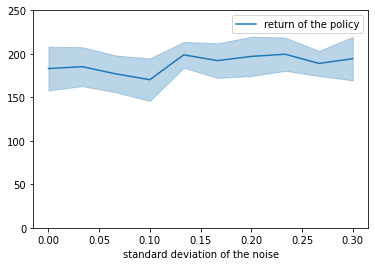

In [21]:
plt.plot(noise_levels, (low+high)/2, label='return of the policy', color='C0')
plt.fill_between(noise_levels, y1=low, y2=high, alpha=0.3, color='C0')
plt.ylim([-0, 250])
plt.legend()
plt.xlabel('standard deviation of the noise')

In [23]:
high

array([208.20957739, 207.65016369, 198.080394  , 194.7386257 ,
       213.74706957, 212.14650227, 219.61743739, 218.74428753,
       203.43188155, 219.36242291])

Text(0.5, 0, 'standard deviation of the noise')

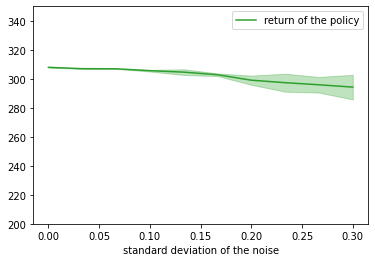

In [39]:
noise_levels = np.array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ])

low = np.array([307.81573795, 306.8540012 , 306.86287799, 305.05926821,
       302.65686923, 301.90370204, 295.90778462, 291.13796362,
       290.51401497, 285.79368917])

high = np.array([308.08808778, 307.17463781, 307.00787757, 306.19059396,
       306.59778195, 303.73556304, 302.21025501, 303.55051949,
       301.30611664, 302.78938317])

plt.plot(noise_levels, (low+high)/2, label='return of the policy', color='C2')
plt.fill_between(noise_levels, y1=low, y2=high, alpha=0.3, color='C2')
plt.ylim([200, 350])
plt.legend()
plt.xlabel('standard deviation of the noise')


In [37]:
high

array([308.08808778, 307.17463781, 307.00787757, 306.19059396,
       306.59778195, 303.73556304, 302.21025501, 303.55051949,
       301.30611664, 302.78938317])

In [34]:
mean = np.array([308, 307, 307  , 306,
       305, 302, 300, 298,
       295, 289])

stds = np.array([0.1, 0.1, 0.3, 0.5, 1.2, 2.0, 3.0, 5.0, 6.0, 7.0])

low = mean - np.random.uniform(0, 2, 10)*stds
high = mean + np.random.uniform(0, 2, 10)*stds

In [27]:
env_name = "LunarLanderContinuous-v2"
env = gym.make(env_name)

env.reset()
M = env.render(mode='rgb_array')
env.close()

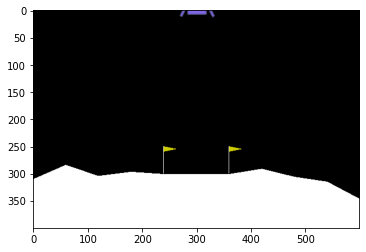

In [28]:
plt.imshow(M)